In [97]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [99]:
x_train.shape

(60000, 28, 28)

In [100]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

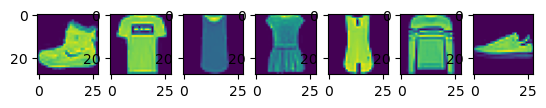

In [101]:
for i in range(7):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [102]:
input_shape = (28, 28, 1)

In [103]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      # Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      # MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [104]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [105]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [106]:
early_stopping_callback = EarlyStopping(monitor='val_acc', patience=2)

In [107]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=25,validation_data =(x_test, y_test_cat), callbacks=[early_stopping_callback])

Epoch 1/25
 789/1875 [===========>..................] - ETA: 10s - loss: 0.4988 - accuracy: 0.8287

KeyboardInterrupt: 

In [ ]:
print("Обучение остановлено на эпохе", early_stopping_callback.stopped_epoch)

Обучение остановлено на эпохе 0


In [ ]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [ ]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=25,validation_data =(x_test, y_test_cat), callbacks=[early_stopping_callback])

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2025 - accuracy: 0.9244 - val_loss: 0.3540 - val_accuracy: 0.8847
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1980 - accuracy: 0.9275 - val_loss: 0.3699 - val_accuracy: 0.8801
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1986 - accuracy: 0.9257 - val_loss: 0.3884 - val_accuracy: 0.8734
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1955 - accuracy: 0.9265 - val_loss: 0.3839 - val_accuracy: 0.8706
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1917 - accuracy: 0.9279 - val_loss: 0.3731 - val_accuracy: 0.8843
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1893 - accuracy: 0.9293 - val_loss: 0.3673 - val_accuracy: 0.8880
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1872 - accuracy: 0.9293 - val_loss: 0.3744 - val_accuracy:

In [ ]:
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [ ]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [108]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=25,validation_data =(x_test, y_test_cat), callbacks=[early_stopping_callback] )

Epoch 1/25
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2069 - accuracy: 0.9251 - val_loss: 0.2441 - val_accuracy: 0.9148
Epoch 2/25
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1821 - accuracy: 0.9328 - val_loss: 0.2239 - val_accuracy: 0.9189
Epoch 3/25
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1588 - accuracy: 0.9416 - val_loss: 0.2363 - val_accuracy: 0.9186
Epoch 4/25
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1385 - accuracy: 0.9480 - val_loss: 0.2350 - val_accuracy: 0.9215
Epoch 5/25
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1205 - accuracy: 0.9545 - val_loss: 0.2498 - val_accuracy: 0.9176
Epoch 6/25
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1061 - accuracy: 0.9601 - val_loss: 0.2583 - val_accuracy: 0.9216
Epoch 7/25
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0922 - accuracy: 0.9660 - val_loss: 0.2729 -

In [ ]:
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [ ]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat) )


Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4318 - accuracy: 0.8426 - val_loss: 0.3483 - val_accuracy: 0.8735
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2748 - accuracy: 0.8988 - val_loss: 0.2877 - val_accuracy: 0.8943
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2312 - accuracy: 0.9147 - val_loss: 0.2589 - val_accuracy: 0.9057
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1990 - accuracy: 0.9255 - val_loss: 0.2403 - val_accuracy: 0.9113
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1746 - accuracy: 0.9354 - val_loss: 0.2531 - val_accuracy: 0.9145
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1528 - accuracy: 0.9427 - val_loss: 0.2509 - val_accuracy: 0.9094
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1352 - accuracy: 0.9487 - val_loss: 0.2524 -

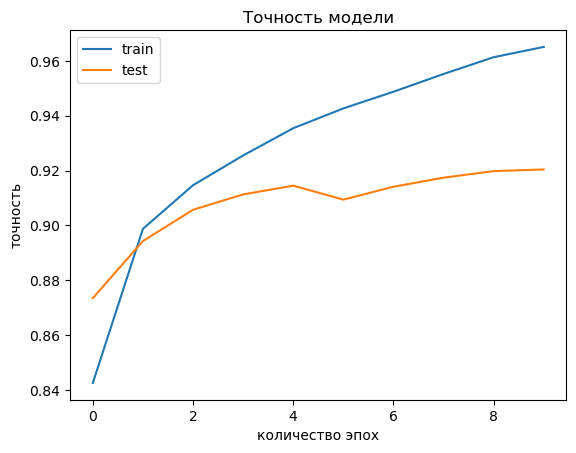

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

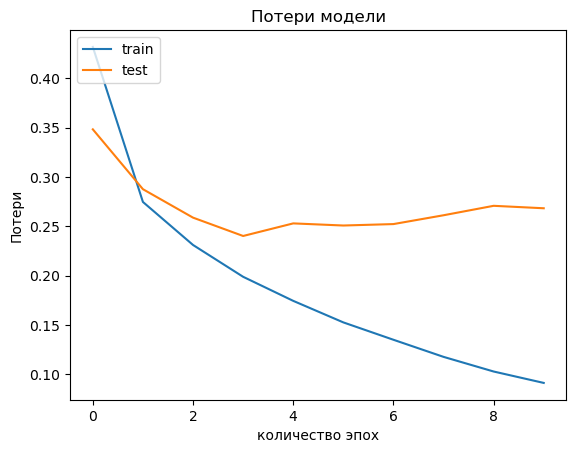

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [ ]:
keras.utils.plot_model(model_4)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [109]:
# Оцениваем работу загруженной модели на тестовых данных
results = model_4.evaluate(x_test, y_test_cat)
print('test loss, test acc:', results)

313/313 [==============================] - 2s 7ms/step - loss: 0.2684 - accuracy: 0.9204
test loss, test acc: [0.2683883011341095, 0.9204000234603882]
